In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import datetime
from statistics import stdev
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


get_ipython().run_line_magic('load_ext', 'nb_black')


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

#### 0. Import files

In [141]:
data_path = r"C:\Users\CCHUINHAO\Desktop\Python Projects\Nanodegree\Blog Post\data\\"


<IPython.core.display.Javascript object>

In [143]:
def import_listings(file):
    """
    INPUT:
    file - string containing file names that we want to import

    OUTPUT:
    listings_dict - dictionary containing the listing df for each city
    """

    listings_dict = {}
    listings_dict[file] = pd.read_csv(data_path + str(file) + ".csv")

    return listings_dict

<IPython.core.display.Javascript object>

In [144]:
file_list = [
    "listings_london",
    "listings_paris",
    "listings_amsterdam",
    "listings_berlin",
    "listings_madrid",
]

<IPython.core.display.Javascript object>

In [145]:
listings_dict={}

for file in file_list:
    df = pd.read_csv(data_path+ str(file) + ".csv")
    listings_dict[file] = format_price(df)


<IPython.core.display.Javascript object>

In [146]:
listings_dict.keys()

dict_keys(['listings_london', 'listings_paris', 'listings_amsterdam', 'listings_berlin', 'listings_madrid'])

<IPython.core.display.Javascript object>

In [147]:
def format_price(df):
    '''
    INPUT:
    df - we want to format price column in listings df because it is currently a string. 
    
    OUTPUT:
    df - listings df with fprice column that is an integer
    '''
    df['fprice'] = (df['price'].str.replace(r"\D","").astype(int)/100).apply(lambda x: round(x))
    return df


<IPython.core.display.Javascript object>

#### 1. Listings across European capital cities

In [148]:
def create_comp_cities(file_list):
    """
    INPUT:
    file_list - list of names of listings df for different cities. we want to perform loop on these listings dataframes so that
    we can get the count of listings and also the average daily price.

    OUTPUT:
    comp_listings - dataframe comparing listings count and average daily price for different cities
    """
    listings_count_list = []
    avg_count_list = []

    for i in file_list:
        listings_count_list.append(
            len(listings_dict.get(i).drop_duplicates(subset=["id"], keep="first"))
        )
        avg_count_list.append(round(listings_dict.get(i)["fprice"].mean()))

    comp_listings = pd.DataFrame(
        {
            "City": [i[9:] for i in file_list],
            "Listings": listings_count_list,
            "Average daily price (USD)": avg_count_list,
        }
    )

    return comp_listings

<IPython.core.display.Javascript object>

In [149]:
comp_listings_df = create_comp_cities(file_list)

<IPython.core.display.Javascript object>

In [150]:
comp_listings_df

,City,Listings,Average daily price (USD)
0,london,74840,116.0
1,paris,63090,113.0
2,amsterdam,17825,154.0
3,berlin,19858,71.0
4,madrid,19618,129.0


<IPython.core.display.Javascript object>

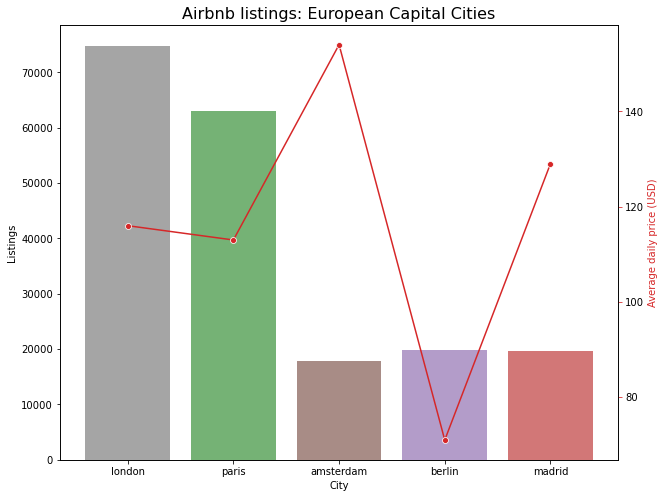

<IPython.core.display.Javascript object>

In [151]:
# We plot a bar and line plot to compare listings count and average daily price.

colors = {
    "london": "tab:grey",
    "paris": "tab:green",
    "amsterdam": "tab:brown",
    "berlin": "tab:purple",
    "madrid": "tab:red",
}

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title("Airbnb listings: European Capital Cities", fontsize=16)
ax1.set_ylabel("Listings", fontsize=10)
# Bar plot
ax1 = sns.barplot(
    x="City",
    y="Listings",
    palette=comp_listings_df["City"].replace(colors).tolist(),
    alpha=0.7,
    data=comp_listings_df,
)

# Line plot
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Average daily price (USD)", fontsize=10, color=color)
ax2 = sns.lineplot(
    x="City",
    y="Average daily price (USD)",
    marker="o",
    data=comp_listings_df,
    sort=False,
    color=color,
)
ax2.tick_params(axis="y", color=color)
plt.show()

London has the most listings. Amsterdam and Madrid have the 2 most expensive average prices - the range of accommodations available is less

#### 2. In London, what is the distribution of listings?

In [152]:
#from https://data.london.gov.uk/dataset/london-borough-profiles
#This file enables us to classify London boroughs according to Inner or Outer London. 
borough = pd.read_excel(data_path+"london-borough-profiles.xlsx",sheet_name='Data')
borough = borough[['Area name','Inner/ Outer London']].dropna()
borough.set_index('Area name',inplace=True)



<IPython.core.display.Javascript object>

In [153]:
listings_london = listings_dict.get("listings_london")
listings_london = listings_london.merge(
    borough, "left", left_on="neighbourhood_cleansed", right_index=True
)
print(
    "Total London boroughs: "
    + str(
        len(
            listings_london.drop_duplicates(
                subset=["neighbourhood_cleansed"], keep="first"
            )
        )
    )
)

Total London boroughs: 33


<IPython.core.display.Javascript object>

In [154]:
# Group listings by borough to identify the number of listings in each borough.

listings_by_borough = (
    listings_london.groupby(["neighbourhood_cleansed", "Inner/ Outer London"])
    .size()
    .to_frame()
)
listings_by_borough.reset_index(inplace=True)
listings_by_borough.columns = ["borough", "Inner/ Outer London", "num_listings"]
listings_by_borough.sort_values(by=["num_listings"], ascending=False, inplace=True)

<IPython.core.display.Javascript object>

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


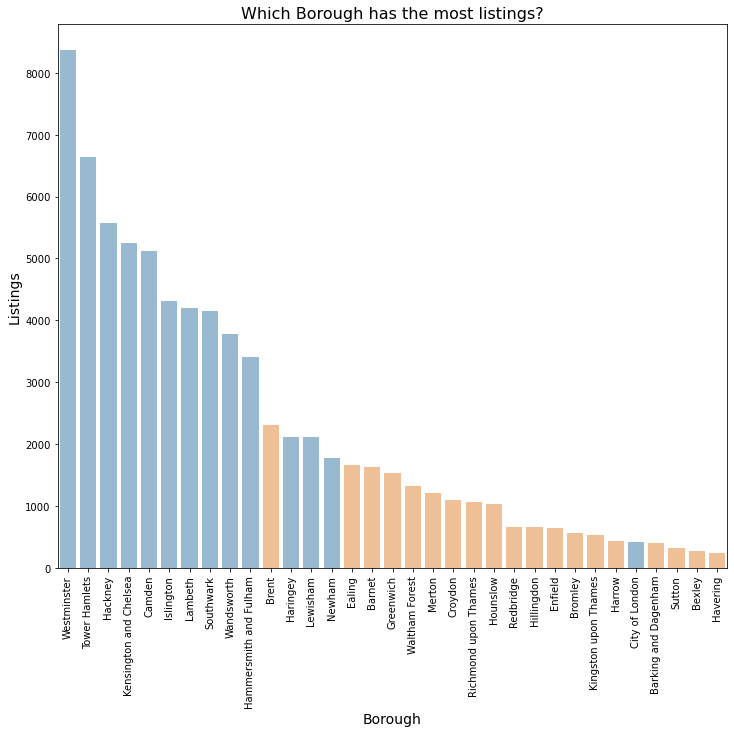

<IPython.core.display.Javascript object>

In [155]:
# We create a bar plot to see which borough has the most listings
colors = {"Inner London": "tab:blue", "Outer London": "tab:orange"}
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    listings_by_borough["borough"],
    listings_by_borough["num_listings"].sort_values(ascending=False),
    alpha=0.5,
    palette=listings_by_borough["Inner/ Outer London"].replace(colors).tolist(),
)
plt.xticks(rotation=90)
plt.xlabel("Borough", size=14)
plt.ylabel("Listings", size=14)
plt.title("Which Borough has the most listings?", size=16)
plt.show()

In [156]:
top10_proportion = round(
    listings_by_borough["num_listings"][0:10].sum()
    / len(listings_london.drop_duplicates(subset=["id"], keep="first"))
    * 100,
    2,
)
print("Proportion of listings in top 10 boroughs: " + str(top10_proportion) + "%")

Proportion of listings in top 10 boroughs: 67.87%


<IPython.core.display.Javascript object>

In [157]:
# We want to see how many listings are there by room type
listings_london['room_type'].value_counts()


Entire home/apt    40617
Private room       33125
Shared room          577
Hotel room           521
Name: room_type, dtype: int64

<IPython.core.display.Javascript object>

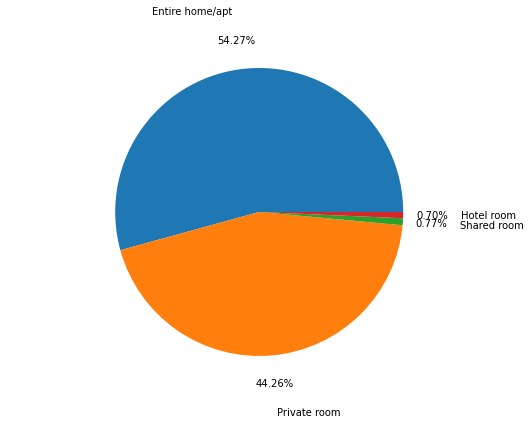

<IPython.core.display.Javascript object>

In [247]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("equal")
langs = ["Entire home/apt", "Private room", "Shared room", "Hotel room"]
ax.pie(
    listings_london["room_type"].value_counts(),
    labels=langs,
    autopct="%1.2f%%",
    pctdistance=1.2,
    labeldistance=1.4,
)
plt.show()

In [159]:
# Find median price by borough. 
median_price = listings_london.groupby('neighbourhood_cleansed')['fprice'].quantile(0.5).to_frame()
median_price.columns=["median_price"]
# Find average number of reviews for listings in a particular borough
average_reviews = listings_london.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().to_frame()
average_reviews.columns = ['avg_num_reviews']

# Merge to get a dataset by borough for: number of listings, median price and average number of reviews
combine_df = listings_by_borough.merge(median_price, "left",left_on='borough', right_index=True)
combine_df = combine_df.merge(average_reviews, "left",left_on='borough', right_index=True)


<IPython.core.display.Javascript object>

In [160]:
combine_df.head()

,borough,Inner/ Outer London,num_listings,median_price,avg_num_reviews
32,Westminster,Inner London,8365,119.0,16.292648
29,Tower Hamlets,Inner London,6633,65.0,14.172923
11,Hackney,Inner London,5576,70.0,12.874641
19,Kensington and Chelsea,Inner London,5250,122.0,15.424000
5,Camden,Inner London,5119,90.0,18.459269


<IPython.core.display.Javascript object>

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


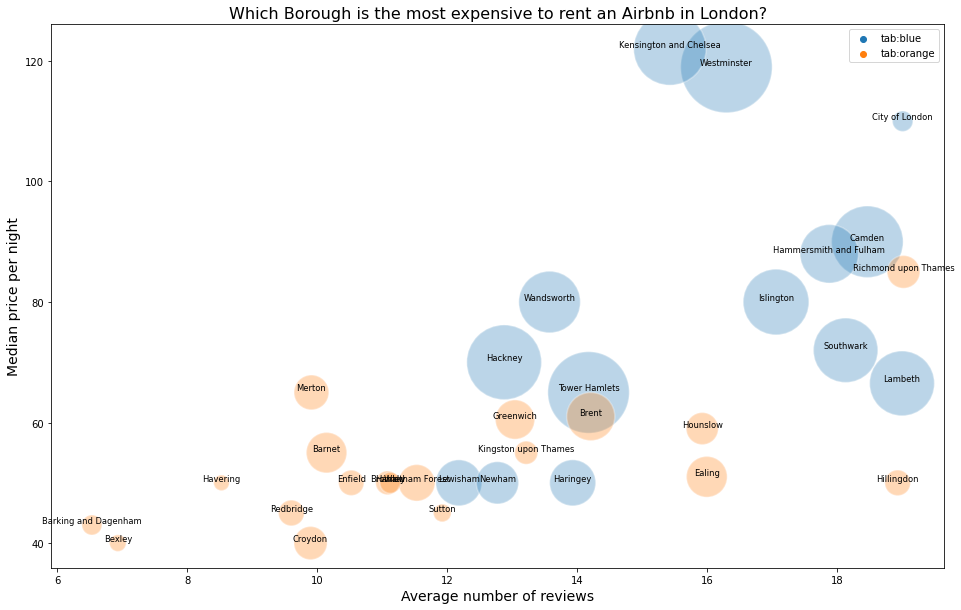

<IPython.core.display.Javascript object>

In [257]:
# Bubble blot compares number of reviews, and median price according to each borough. Size of bubble indicates listings count.
#

plt.figure(figsize=(16, 10))

ax = sns.scatterplot(
    combine_df["avg_num_reviews"],
    combine_df["median_price"],
    s=combine_df["num_listings"],
    alpha=0.3,
    hue=combine_df["Inner/ Outer London"].replace(colors).tolist(),
)

# For each point, we add a borough name inside the bubble
for line in range(0, len(combine_df)):
    ax.text(
        combine_df.avg_num_reviews[line],
        combine_df.median_price[line],
        combine_df.borough[line],
        verticalalignment="bottom",
        horizontalalignment="center",
        size="small",
        color="black",
    )
plt.xlabel("Average number of reviews", size=14)
plt.ylabel("Median price per night", size=14)
plt.title("Which Borough is the most expensive to rent an Airbnb in London?", size=16)
plt.show()

We can see that the top 10 boroughs with the highest concentration of listings are in Inner London boroughs - these 10 boroughs make up over two thirds of London Airbnbs. 



#### 3. Which area has the best reviews?

In [162]:
def w_avg(df, values, weights):
    '''
    INPUT:
    df - listings dataframe
    values - review score
    weights- number of reviews
    
    OUTPUT:
    weighted average
    '''
    d = df[values]
    w = df[weights]
    
    return (d*w).sum()/w.sum()

# We use the weighted average review score instead of just the average review score for a borough. This is due to the high number
# of reviews for Inner London airbnbs. 
w_avg_review_df = listings_london.groupby(['neighbourhood_cleansed','Inner/ Outer London']).apply(w_avg,'review_scores_rating','number_of_reviews').sort_values(ascending=False).reset_index()
w_avg_review_df.columns =['borough','Inner/ Outer London','w_avg_review_score']



<IPython.core.display.Javascript object>

In [163]:
print(
    "Average review score of London Airbnbs: "
    + str(round(w_avg_review_df.w_avg_review_score.mean()))
)

Average review score of London Airbnbs: 95.0


<IPython.core.display.Javascript object>

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


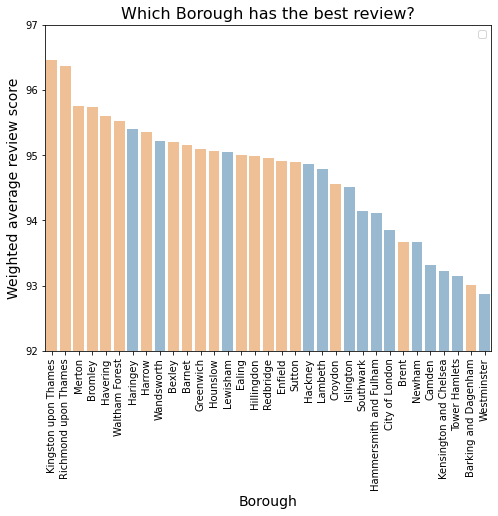

<IPython.core.display.Javascript object>

In [250]:
colors = {"Inner London": "tab:blue", "Outer London": "tab:orange"}
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    w_avg_review_df["borough"],
    w_avg_review_df["w_avg_review_score"],
    #                      s=price_num_listings['listings'],
    alpha=0.5,
    palette=w_avg_review_df["Inner/ Outer London"].replace(colors).tolist()
    #                      hue =w_avg_review_df['Inner/ Outer London']
)
ax.set(ylim=(92, 97))
plt.xticks(rotation=90)
plt.xlabel("Borough", size=14)
plt.ylabel("Weighted average review score", size=14)
plt.title("Which Borough has the best review?", size=16)
plt.legend()

plt.show()

Excluding shared rooms, there is a consistent premium for Inner London over Outer London across room types. This reflects the higher cost of living and maintaining central London properties, and also the willingness to pay of travellers that prefer to stay in central London. The premium goes to as high as 33% for entire home/apartment. 

Sharing room is cheaper in Inner London relative to Outer. Prices are set low possibly to reflect lower demand to share rooms in densely populated Inner London boroughs due to the pandemic.


In [198]:
reviews_london = pd.read_csv(data_path + "reviews_london.csv")

reviews_london.shape

(1129280, 6)

<IPython.core.display.Javascript object>

In [201]:
# Merge with listings df so identify which listings are inner/outer london
reviews_london = reviews_london.merge(
    listings_london[
        ["id", "room_type", "neighbourhood_cleansed", "Inner/ Outer London"]
    ],
    "left",
    left_on="listing_id",
    right_on="id",
)

<IPython.core.display.Javascript object>

In [248]:
def create_word_cloud(df):
    
    df = df[~df.comments.isna()]
    
    text = " ".join(review for review in df.comments)
    print("There are {} words in the combination of all review.".format(len(text)))
    
    stopwords = set(STOPWORDS)
    stopwords.update(
        [
            "flat",
            "stay",
            "stayed",
            "place",
            "apartment",
            "everything",
            "need",
            "needed",
            "day",
            "London",
            "room",
            "make",
            "house",
            "home"
        ]
        )
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    
    plt.figure(figsize=[12, 12])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


<IPython.core.display.Javascript object>

There are 291715761 words in the combination of all review.


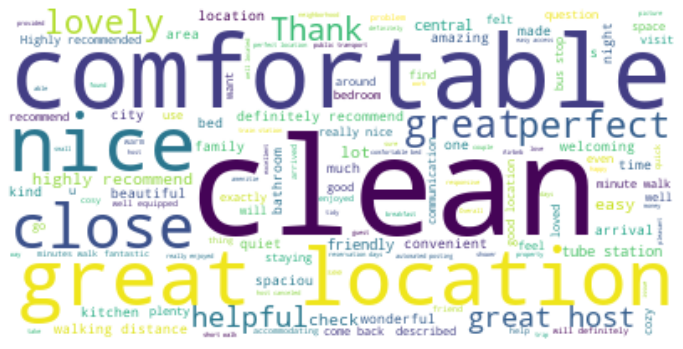

<IPython.core.display.Javascript object>

In [249]:
create_word_cloud(reviews_london)

#### 4. How much can you expect to save by living in Inner London vs outer London?

In [166]:
def room_type_by_area(df, area):
    """
    INPUT:
    df - listings dataframe
    area - whether inner or outer london

    OUTPUT:
    dataframe showing the average price of inner or outer london for different room types
    """
    london_area = df[df["Inner/ Outer London"] == area]

    room_type_price = london_area.groupby("room_type")["fprice"].mean().reset_index()

    room_type_price.columns = ["room_type", area]

    return room_type_price


inner_df = room_type_by_area(listings_london, "Inner London")
outer_df = room_type_by_area(listings_london, "Outer London")

compare_df = inner_df.merge(outer_df, "left", on="room_type")
compare_df["Inner Premium"] = round(
    (compare_df["Inner London"] - compare_df["Outer London"])
    / compare_df["Outer London"]
    * 100,
    2,
)

<IPython.core.display.Javascript object>

In [167]:
compare_df.style.bar(
    subset=["Inner Premium"], align="mid", color=["#d65f5f", "#5fba7d"]
)

,room_type,Inner London,Outer London,Inner Premium
0,Entire home/apt,167.279420,126.178387,32.570000
1,Hotel room,130.583942,113.509091,15.040000
2,Private room,64.216640,57.638031,11.410000
3,Shared room,63.199041,65.825000,-3.990000


<IPython.core.display.Javascript object>

- Excluding shared rooms, there is a consistent premium for Inner London over Outer London across room types. This reflects the higher cost of living and maintaining central London properties, and also the willingness to pay of travellers that prefer to stay in central London. The premium goes to as high as 33% for entire home/apartment. 
- Sharing room is cheaper in Inner London relative to Outer. Prices are set low possibly to reflect lower demand to share rooms in densely populated Inner London boroughs due to the pandemic.

#### 5. How does the pricing in London change over time. 

In [168]:
calendar_london = pd.read_csv(data_path+"calendar_london.csv")

calendar_london.shape

(27329674, 7)

<IPython.core.display.Javascript object>

In [169]:
# Since missing value for price is less than 0.01% of dataset, we drop them.
calendar_london[calendar_london.price.isna()].shape

(2148, 7)

<IPython.core.display.Javascript object>

In [170]:
calendar_london = calendar_london[~calendar_london.price.isna()].reset_index(drop=True)


<IPython.core.display.Javascript object>

In [171]:
calendar_london = format_price(calendar_london)

<IPython.core.display.Javascript object>

In [172]:
# Merge with listings df so identify which listings are inner/outer london
calendar_listings = calendar_london.merge(
    listings_london[
        ["id", "room_type", "neighbourhood_cleansed", "Inner/ Outer London"]
    ],
    "left",
    left_on="listing_id",
    right_on="id",
)

<IPython.core.display.Javascript object>

In [173]:
calendar_listings['date'] = pd.to_datetime(calendar_listings['date'])


<IPython.core.display.Javascript object>

In [174]:
# Due to variability in prices between inner and outer london bnbs, it would not make sense to look at them in aggregate.
# Here we just look at inner london bnbs.
calender_inner = calendar_listings[
    calendar_listings["Inner/ Outer London"] == "Inner London"
].reset_index(drop=True)
calendar_grouped = (
    calender_inner.groupby(["date", "room_type"])["fprice"]
    .mean()
    .to_frame()
    .reset_index()
)

<IPython.core.display.Javascript object>

In [175]:
time_series_by_room = calendar_grouped.pivot(
    index="date", columns="room_type", values="fprice"
).reset_index()
time_series_by_room.head()

room_type,date,Entire home/apt,Hotel room,Private room,Shared room
0,2021-04-11,154.934918,15.166667,59.450000,33.125000
1,2021-04-12,139.363740,195.971429,53.097974,59.534483
2,2021-04-13,132.499149,190.783784,51.046995,53.509091
3,2021-04-14,163.400805,136.330612,60.800770,60.313901
4,2021-04-15,170.715139,134.137380,63.511612,62.108844


<IPython.core.display.Javascript object>

In [176]:
# We want to look at the periods for the remainder of the year
start_date = datetime.datetime(2021, 7, 1)
end_date = datetime.datetime(2021, 12, 31)
jul_dec = time_series_by_room[
    (time_series_by_room.date > start_date) & (time_series_by_room.date <= end_date)
]

<IPython.core.display.Javascript object>

In [177]:
room_type_list = listings_london.room_type.drop_duplicates().tolist()

for room in room_type_list:
    print("Std dev for {}: ".format(room) + str(round(stdev(jul_dec[room]),2)))


Std dev for Entire home/apt: 5.96
Std dev for Private room: 1.57
Std dev for Hotel room: 35.77
Std dev for Shared room: 6.29


<IPython.core.display.Javascript object>

In [178]:
jul_dec["day_of_week"] = jul_dec.date.apply(
    lambda x: "weekend" if x.weekday() > 4 else "weekday"
)

day_list = ["weekday", "weekend"]
room_type_list = ["Hotel room", "Entire home/apt"]

for day in day_list:
    for room in room_type_list:
        print(
            "Average daily price of {} during {}: ".format(room, day)
            + str(round(jul_dec[jul_dec.day_of_week == day][room].mean(), 2))
        )

Average daily price of Hotel room during weekday: 242.26
Average daily price of Entire home/apt during weekday: 188.66
Average daily price of Hotel room during weekend: 218.65
Average daily price of Entire home/apt during weekend: 190.25


c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

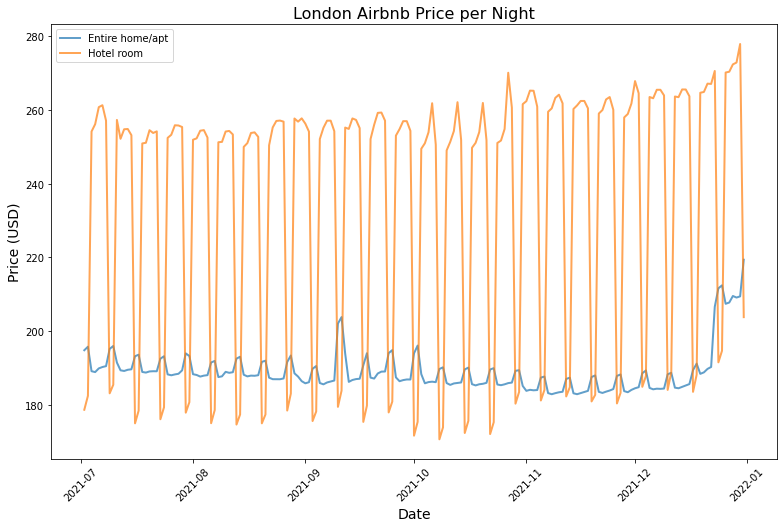

<IPython.core.display.Javascript object>

In [270]:
plt.figure(figsize=(13,8))

plt.plot(jul_dec.date, 'Entire home/apt', data=jul_dec, marker='', linewidth=2, label="Entire home/apt",alpha=0.7)
plt.plot(jul_dec.date, 'Hotel room', data=jul_dec, marker='', linewidth=2, label="Hotel room",alpha=0.7)

plt.title('London Airbnb Price per Night', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)',  fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.show();


There is a premium on weekdays for hotels compared to weekends. During weekdays, hotels attract business travelers who tend to not mind the price that they pay because it can be reimbursed. Conversely, for entire home/flat, there is a premium for weekends. 